<a href="https://colab.research.google.com/github/mohsin-x86/ProjectFemCode/blob/main/RandomForestParam_grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [33]:

print(os.listdir('/content/drive/My Drive/Colab Notebooks'))

['Untitled1.ipynb', '9016Accuracy.ipynb', 'originalheart.csv', 'Untitled3.ipynb', 'RandomForest.ipynb', 'RandomForestLoop.ipynb', 'Untitled4.ipynb', 'RandomForestParam_grid.ipynb']


In [34]:
# Load the dataset from Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/originalheart.csv'
ds = pd.read_csv(file_path)

# Split the dataset into features (X) and target (y)
X = ds.drop(columns='target')
y = ds['target']


Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 14, 'n_estimators': 68}
Mean Accuracy: 0.581311475409836
Standard Deviation: 0.058117933275662385
Minimum Accuracy: 0.4426229508196721
Maximum Accuracy: 0.7377049180327869


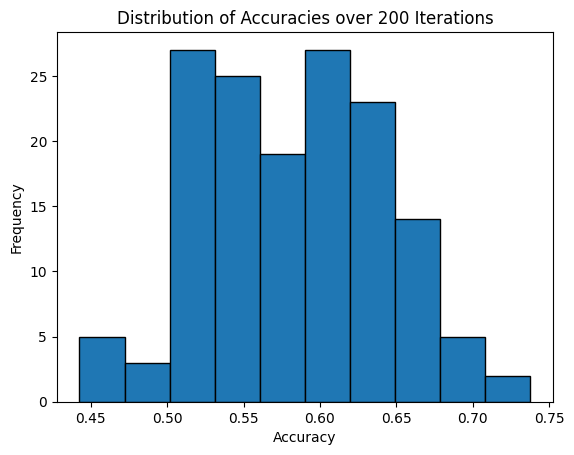

In [39]:


# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [67, 68, 69, 70, 71, 72,],
    'max_depth': [ 3, 5, 10, 15,],
    'min_samples_split': [10, 11, 12,13,14],
    'min_samples_leaf': [4, 5, 7,],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Split the data into training and testing sets for GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Replace '?' with NaN and convert to numeric
X_train = X_train.replace('?', np.nan).apply(pd.to_numeric, errors='coerce')
X_test = X_test.replace('?', np.nan).apply(pd.to_numeric, errors='coerce')
y_train = y_train.replace('?', np.nan).apply(pd.to_numeric, errors='coerce')
y_test = y_test.replace('?', np.nan).apply(pd.to_numeric, errors='coerce')

# Fill NaN values with the mean of each column
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Run multiple iterations with the best parameters found
iterations = 150
random_state = 50
accuracies = []

for i in range(iterations):
    # Split the data into training and testing sets with different random states
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state+i)

    # Replace '?' with NaN and convert to numeric
    X_train = X_train.replace('?', np.nan).apply(pd.to_numeric, errors='coerce')
    X_test = X_test.replace('?', np.nan).apply(pd.to_numeric, errors='coerce')
    y_train = y_train.replace('?', np.nan).apply(pd.to_numeric, errors='coerce')
    y_test = y_test.replace('?', np.nan).apply(pd.to_numeric, errors='coerce')

    # Fill NaN values with the mean of each column
    X_train.fillna(X_train.mean(), inplace=True)
    X_test.fillna(X_test.mean(), inplace=True)
    y_train.fillna(y_train.mean(), inplace=True)
    y_test.fillna(y_test.mean(), inplace=True)

    # Create and train the Random Forest model with the best parameters
    rf = RandomForestClassifier(**best_params, random_state=random_state+i)
    rf.fit(X_train, y_train)

    # Make predictions
    y_pred = rf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Convert accuracies to a numpy array and calculate statistics
accuracies = np.array(accuracies)
print(f"Mean Accuracy: {accuracies.mean()}")
print(f"Standard Deviation: {accuracies.std()}")
print(f"Minimum Accuracy: {accuracies.min()}")
print(f"Maximum Accuracy: {accuracies.max()}")

# Plot the distribution of accuracies over iterations
plt.hist(accuracies, bins=10, edgecolor='k')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracies over 200 Iterations')
plt.show()
